In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
for i in range(4):
    if i==0:
        appliance = "dish washer"
        name = f"DishWasher_s2p.csv"
    elif i==1:
        appliance = "fridge"
        name = f"Fridge_s2p.csv"
    elif i==2:
        appliance = "microwave"
        name = f"Microwave_s2p.csv"
    else:
        appliance = "washer dryer"
        name = f"WasherDryer_s2p.csv"

    pred_filename = 'pred_'+name
    gt_filename = 'gt_'+name
    var_filename = 'var_'+name

    df_gt = pd.read_csv(gt_filename)
    df_pred = pd.read_csv(pred_filename)
    df_var = pd.read_csv(var_filename)

    rmse = 0
    mae = 0
    rmse_un = 0
    mae_un = 0
    for j in range(len(df_pred)):
        rmse += (df_gt.loc[j, appliance] - df_pred.loc[j, appliance])**2
        mae += abs(df_gt.loc[j, appliance] - df_pred.loc[j, appliance])
        mae_un += df_var['0'][j]
        rmse_un += 2*(df_var['0'][j]/(df_pred.loc[j, appliance]+0.001))
    
    rmse /= len(df_pred)
    rmse = rmse**0.5

    rmse_un = rmse*(rmse_un)**0.5*(1/len(df_pred))

    mae /= len(df_pred)
    mae_un /= len(df_pred)

    print(f"Experiment Number {appliance} RMSE: {round(rmse,2)}")
    print(f"Experiment Number {appliance} RMSE Uncertainity: {round(rmse_un, 3)}")
    print(f"Experiment Number {appliance} MAE: {round(mae,2)}")
    print(f"Experiment Number {appliance} MAE Uncertainity: {round(mae_un, 3)}")

Experiment Number dish washer RMSE: 33.99
Experiment Number dish washer RMSE Uncertainity: 0.337
Experiment Number dish washer MAE: 5.48
Experiment Number dish washer MAE Uncertainity: 2.833
Experiment Number fridge RMSE: 47.13
Experiment Number fridge RMSE Uncertainity: 0.372
Experiment Number fridge MAE: 30.58
Experiment Number fridge MAE Uncertainity: 9.803
Experiment Number microwave RMSE: 96.28
Experiment Number microwave RMSE Uncertainity: 0.91
Experiment Number microwave MAE: 24.44
Experiment Number microwave MAE Uncertainity: 13.306
Experiment Number washer dryer RMSE: 0.91
Experiment Number washer dryer RMSE Uncertainity: 0.013
Experiment Number washer dryer MAE: 0.76
Experiment Number washer dryer MAE Uncertainity: 4.035


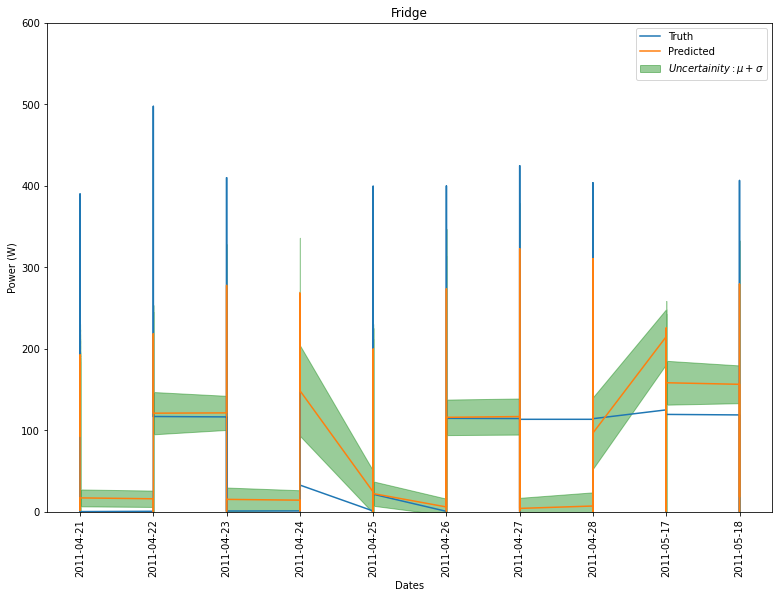

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_Fridge_s2p.csv')
df_pred = pd.read_csv('pred_Fridge_s2p.csv')
df_var = pd.read_csv('var_Fridge_s2p.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['fridge'], label = 'Truth')
plt.plot(date, df_pred['fridge'], label = 'Predicted')
plt.fill_between( date,
        df_pred['fridge'] - df_var['0'] * ((1+1.)),
        df_pred['fridge'] + df_var['0'] * ((1+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu + \sigma$')
plt.title("Fridge")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 600)
plt.legend(loc = 'best')
plt.savefig('plt_Fridge_s2p.pdf', bbox_inches = 'tight')
plt.show()

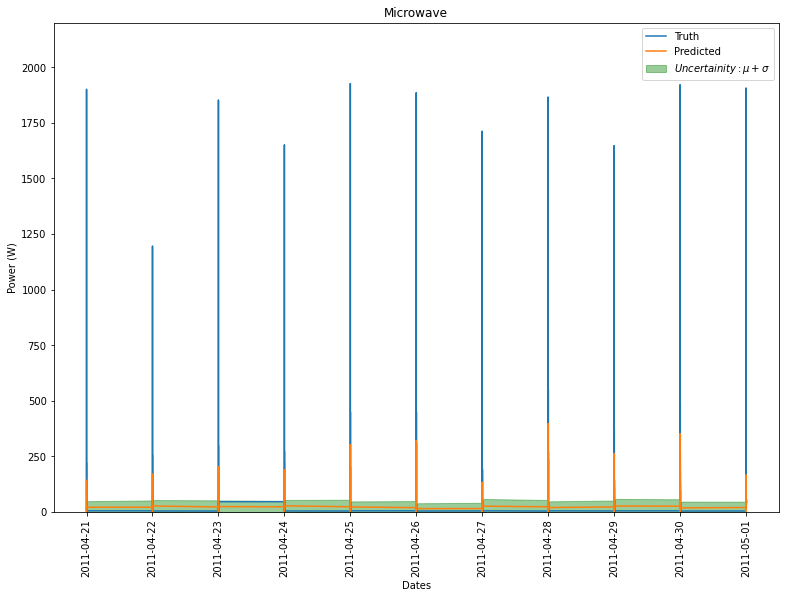

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_Microwave_s2p.csv')
df_pred = pd.read_csv('pred_Microwave_s2p.csv')
df_var = pd.read_csv('var_Microwave_s2p.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['microwave'], label = 'Truth')
plt.plot(date, df_pred['microwave'], label = 'Predicted')
plt.fill_between( date,
        df_pred['microwave'] - df_var['0'] * ((1+1.)),
        df_pred['microwave'] + df_var['0'] * ((1+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu + \sigma$')
plt.title("Microwave")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 2200)
plt.legend(loc = 'best')
plt.savefig('plt_Microwave_s2p.pdf', bbox_inches = 'tight')
plt.show()

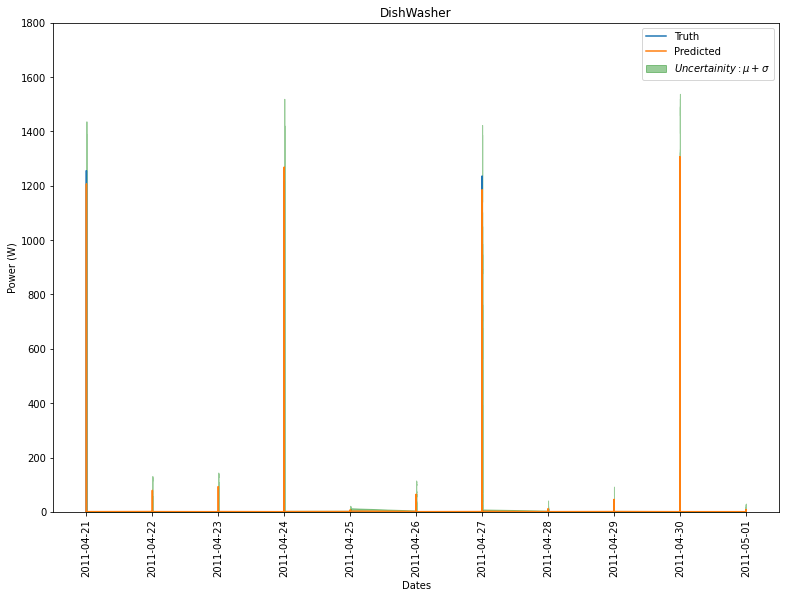

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_DishWasher_s2p.csv')
df_pred = pd.read_csv('pred_DishWasher_s2p.csv')
df_var = pd.read_csv('var_DishWasher_s2p.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((1+1.)),
        df_pred['dish washer'] + df_var['0'] * ((1+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu + \sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1800)
plt.legend(loc = 'best')
plt.savefig('plt_DishWasher_s2p.pdf', bbox_inches = 'tight')
plt.show()

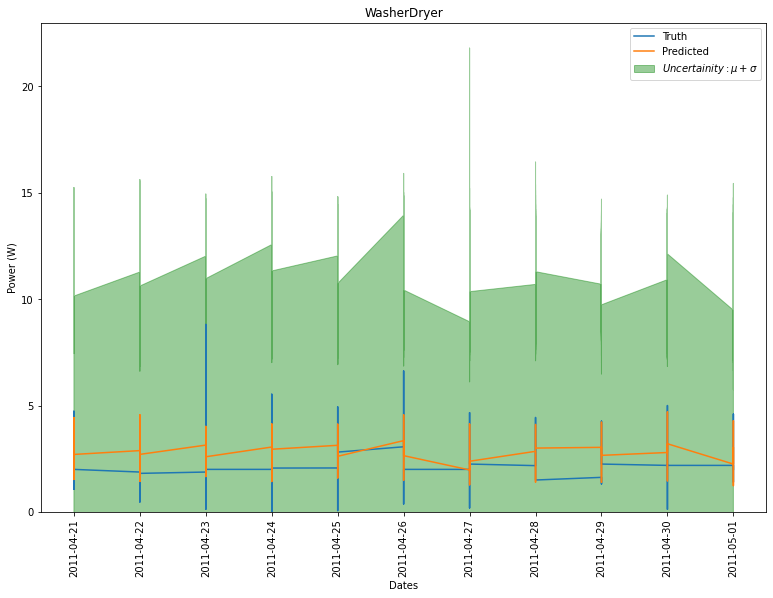

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_WasherDryer_s2p.csv')
df_pred = pd.read_csv('pred_WasherDryer_s2p.csv')
df_var = pd.read_csv('var_WasherDryer_s2p.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['washer dryer'], label = 'Truth')
plt.plot(date, df_pred['washer dryer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['washer dryer'] - df_var['0'] * ((1+1.)),
        df_pred['washer dryer'] + df_var['0'] * ((1+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu + \sigma$')
plt.title("WasherDryer")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 23)
plt.legend(loc = 'best')
plt.savefig('plt_WasherDryer_s2p.pdf', bbox_inches = 'tight')
plt.show()

In [7]:
import plotly.graph_objs as go
import pandas as pd

df_gt = pd.read_csv('gt_Fridge_s2p.csv')
df_pred = pd.read_csv('pred_Fridge_s2p.csv')
df_var = pd.read_csv('var_Fridge_s2p.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])

x = date
yt = df_gt['fridge']
y = df_pred['fridge']

fig = go.Figure([
    go.Scatter(
        name='Truth',
        x=x,
        y=yt,
        mode='lines',
        line=dict(color='rgb(0, 76, 153)'),
        showlegend = True
    ),
    go.Scatter(
        name='Predicted',
        x=x,
        y=y,
        mode='lines',
        line=dict(color='rgb(255, 128, 0)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=x,
        y=y+df_var['0'] * ((1+1.)),
        mode='lines',
        marker=dict(color="#66FF66"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=x,
        y=y-df_var['0'] * ((1+1.)),
        marker=dict(color="#66FF66"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(0, 204, 102, 0.5)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='Power (W)',
    xaxis_title='Dates',
    title='Fridge',
    hovermode="x"
)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})


fig.show()